In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import pickle
from google.colab import files

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()
df.info()
df.describe()
df.shape
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Drop unnecessary ID column
df = df.drop('Id', axis=1)


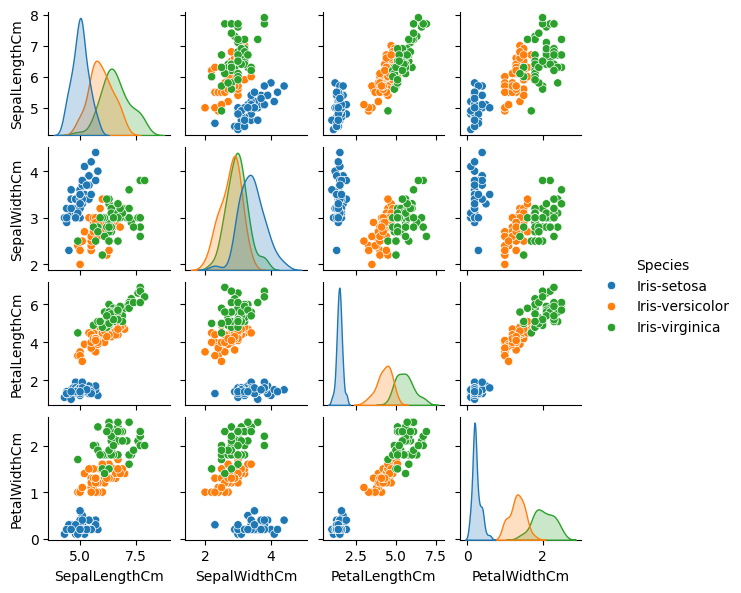

In [ ]:
sns.pairplot(df, hue='Species', height=1.5)
plt.show()

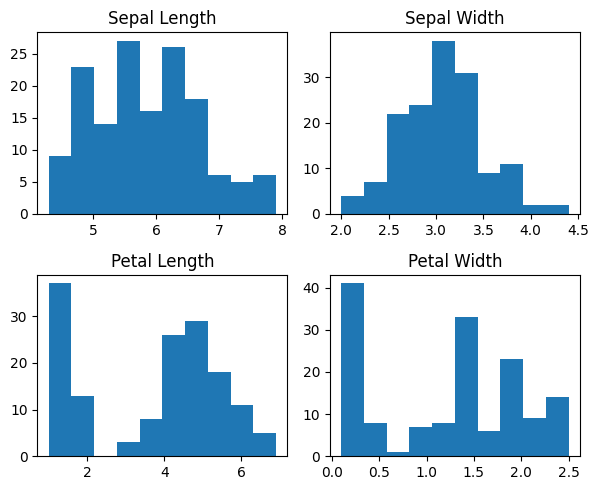

In [ ]:
plt.figure(figsize=(6,5))

plt.subplot(2, 2, 1)
plt.hist(df['SepalLengthCm'], bins=10)
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
plt.hist(df['SepalWidthCm'], bins=10)
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
plt.hist(df['PetalLengthCm'], bins=10)
plt.title('Petal Length')

plt.subplot(2, 2, 4)
plt.hist(df['PetalWidthCm'], bins=10)
plt.title('Petal Width')

plt.tight_layout()
plt.show()


<Axes: xlabel='SepalLengthCm', ylabel='Species'>

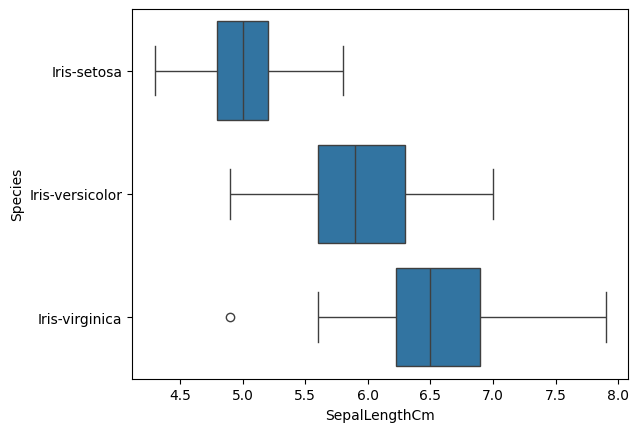

In [ ]:
sns.boxplot(y='Species', x='SepalLengthCm', data=df)

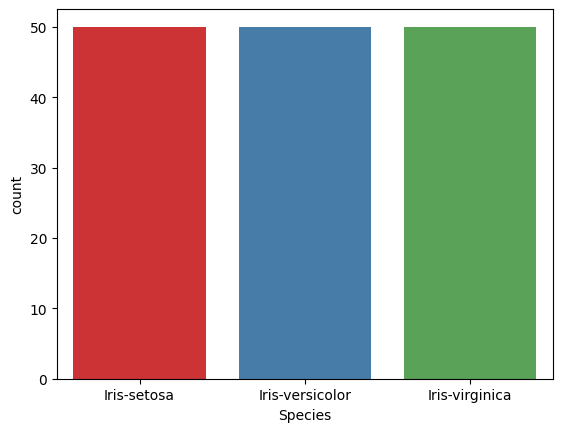

In [ ]:
sns.countplot(x='Species', data=df, hue='Species', palette='Set1')
plt.show()


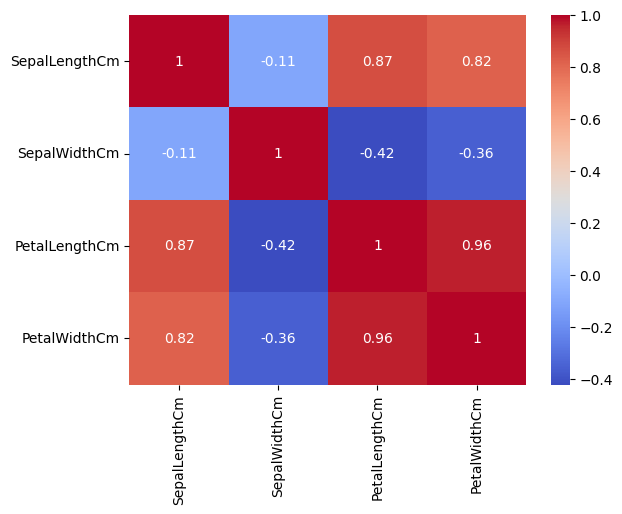

In [ ]:
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
X = df.drop('Species', axis=1)   # Features
y = df['Species']                # Target (multiclass)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9210526315789473
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9736842105263158
[[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
# svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# svm_model = SVC(kernel='poly', degree=3, C=1.0)

# svm_model = SVC(kernel='sigmoid', C=1.0)


In [ ]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9210526315789473
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



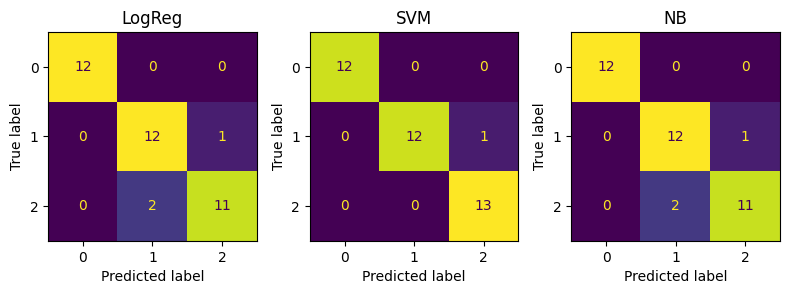

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

models = [log_reg, svm_model, nb_model]
titles = ['LogReg', 'SVM', 'NB']

for ax, model, title in zip(axes, models, titles):
    ConfusionMatrixDisplay(
        confusion_matrix(y_test, model.predict(X_test_scaled))
    ).plot(ax=ax, colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [ ]:
# New flower measurements
new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_scaled = scaler.transform(new_sample)

print("Logistic Regression Prediction:", log_reg.predict(new_sample_scaled))
print("SVM Prediction:", svm_model.predict(new_sample_scaled))
print("Naive Bayes Prediction:", nb_model.predict(new_sample_scaled))


Logistic Regression Prediction: ['Iris-setosa']
SVM Prediction: ['Iris-setosa']
Naive Bayes Prediction: ['Iris-setosa']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
models = {
    "Logistic Regression": log_reg,
    "SVM": svm_model,
    "Naive Bayes": nb_model
}

best_name, best_model, best_score = None, None, 0

for name, model in models.items():
    score = model.score(X_test_scaled, y_test)
    print(f"{name} Accuracy: {score:.4f}")
    if score > best_score:
        best_name, best_model, best_score = name, model, score

print("\nBest Model:", best_name)
print("Best Accuracy:", best_score)


Logistic Regression Accuracy: 0.9211
SVM Accuracy: 0.9737
Naive Bayes Accuracy: 0.9211

Best Model: SVM
Best Accuracy: 0.9736842105263158


In [ ]:
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

#files.download('best_model.pkl')
#files.download('scaler.pkl')
